Electric Vehicle Population Clustering for Data-Driven Insights

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')
# import warnings: This imports Python’s built-in warnings module, which controls warning messages (like deprecation warnings, user warnings, etc.).


In [14]:
import pandas as pd

# Load the Excel file
df = pd.read_csv(r'D:\python_projects\Electric_Vehicle_Population_Data\data\Electric_Vehicle_Population_Data.csv')

# Show the first few rows
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2C4RC1N71H,Kitsap,Bremerton,WA,98311.0,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,23.0,349437882,POINT (-122.6466274 47.6341188),PUGET SOUND ENERGY INC,5.303509e+10
1,2C4RC1N7XL,Stevens,Colville,WA,99114.0,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,7.0,154690532,POINT (-117.90431 48.547075),AVISTA CORP,5.306595e+10
2,KNDC3DLCXN,Yakima,Yakima,WA,98908.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,14.0,219969144,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA0J,Kitsap,Bainbridge Island,WA,98110.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,476786887,POINT (-122.5235781 47.6293323),PUGET SOUND ENERGY INC,5.303509e+10
4,1N4AZ1CP7J,Thurston,Tumwater,WA,98501.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,35.0,201185253,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [15]:
df.shape

(159467, 17)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159467 entries, 0 to 159466
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         159467 non-null  object 
 1   County                                             159463 non-null  object 
 2   City                                               159463 non-null  object 
 3   State                                              159467 non-null  object 
 4   Postal Code                                        159463 non-null  float64
 5   Model Year                                         159467 non-null  int64  
 6   Make                                               159467 non-null  object 
 7   Model                                              159467 non-null  object 
 8   Electric Vehicle Type                              159467 non-null  object

In [17]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,159463.000000,159467.000000,159467.000000,159467.00000,159106.000000,1.594670e+05,1.594630e+05
mean,98170.373635,2020.192510,64.283319,1227.63716,29.261675,2.140242e+08,5.297287e+10
std,2453.354932,3.010564,94.634277,8930.03468,14.843878,7.959275e+07,1.621526e+09
min,1730.000000,1997.000000,0.000000,0.00000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.00000,18.000000,1.731016e+08,5.303301e+10
50%,98122.000000,2021.000000,14.000000,0.00000,33.000000,2.198450e+08,5.303303e+10
75%,98370.000000,2023.000000,84.000000,0.00000,43.000000,2.448363e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.00000,49.000000,4.792548e+08,5.603300e+10


In [18]:
# Shape before cleaning
print("Initial shape:", df.shape)

# Remove duplicates
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

# Check missing values
print("Missing values:\n", df.isnull().sum())

# Drop columns with too many missing values if necessary or fill missing
df = df.fillna({
    'Electric Range': df['Electric Range'].median()
})

# Handling outliers in 'Electric Range' using IQR
Q1 = df['Electric Range'].quantile(0.25)
Q3 = df['Electric Range'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows
df = df[(df['Electric Range'] >= lower_bound) & (df['Electric Range'] <= upper_bound)]
print("Shape after outlier removal:", df.shape)


Initial shape: (159467, 17)
Shape after removing duplicates: (159467, 17)
Missing values:
 VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 361
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                      

EDA (Exploratory Data Analysis)

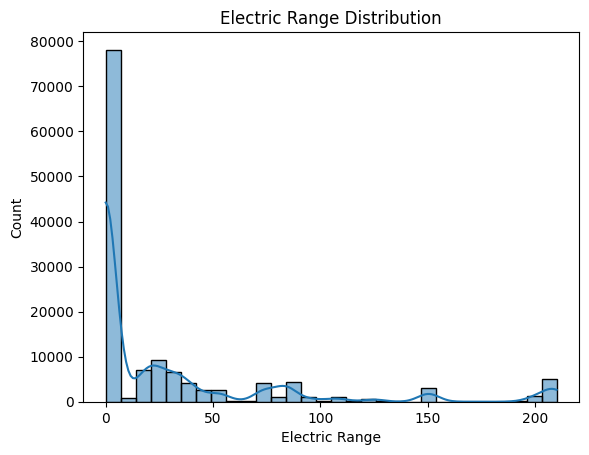

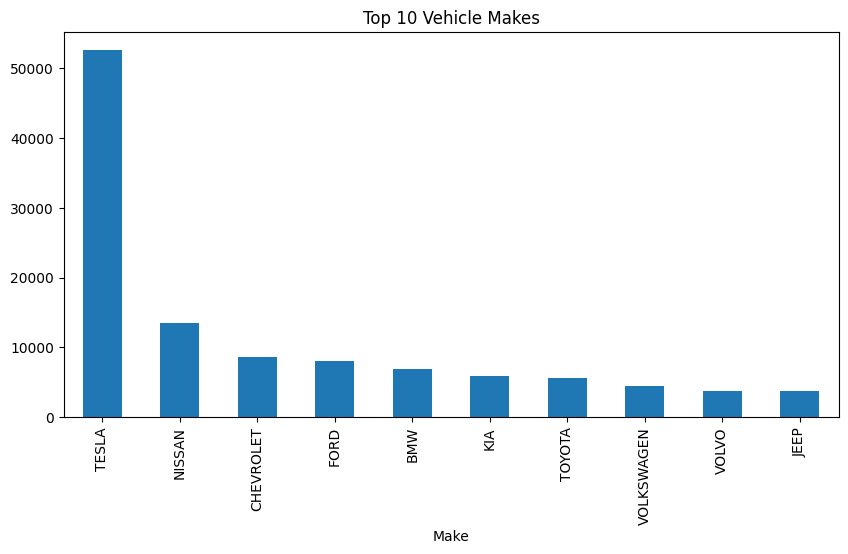

In [19]:
# Electric Range distribution
sns.histplot(df['Electric Range'], kde=True, bins=30)
plt.title('Electric Range Distribution')
plt.show()

# Vehicle makes count
plt.figure(figsize=(10,5))
df['Make'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Vehicle Makes')
plt.show()


Preprocessing for Clustering

In [20]:
# Select relevant features for clustering
features = df[['Make', 'Model', 'Electric Range']].copy()

# Label Encoding for categorical columns
le_make = LabelEncoder()
le_model = LabelEncoder()

features['Make'] = le_make.fit_transform(features['Make'])
features['Model'] = le_model.fit_transform(features['Model'])

# Feature Scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

features_scaled[:5]


array([[-1.54655267,  0.34986794,  0.07591215],
       [-1.54655267,  0.34986794,  0.05669599],
       [-0.6256999 , -1.18588802, -0.55822123],
       [ 0.20306759, -0.11085884,  2.3434194 ],
       [ 0.01889703, -1.8385843 , -0.32762727]])

Clustering — KMeans

###It loops over each k from 2 to 9, fits KMeans on the full dataset every time, and computes the silhouette score.

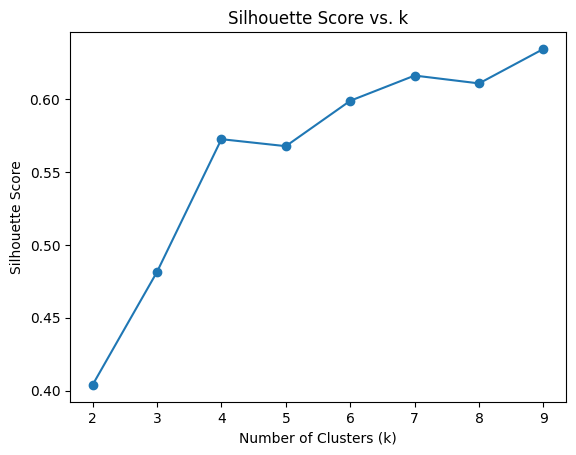

In [21]:
# Find optimal k using silhouette score
sil_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    score = silhouette_score(features_scaled, kmeans.labels_)
    sil_scores.append(score)

plt.plot(k_range, sil_scores, marker='o')
plt.title('Silhouette Score vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Apply KMeans with best k
best_k = k_range[np.argmax(sil_scores)]
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(features_scaled)


Used MiniBatchKMeans (It is Much Faster on Large Data)

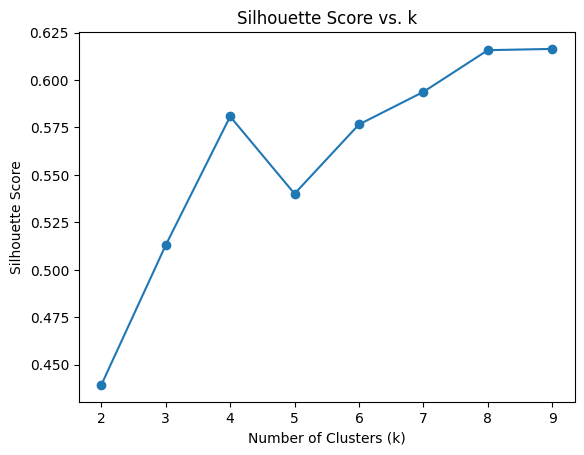

In [22]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

sil_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1024)
    kmeans.fit(features_scaled)
    score = silhouette_score(features_scaled, kmeans.labels_, sample_size=1000, random_state=42)
    sil_scores.append(score)

plt.plot(k_range, sil_scores, marker='o')
plt.title('Silhouette Score vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Apply KMeans with best k
best_k = k_range[np.argmax(sil_scores)]
kmeans = MiniBatchKMeans(n_clusters=best_k, random_state=42, batch_size=1024)
df['KMeans_Cluster'] = kmeans.fit_predict(features_scaled)


Clustering — hDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise)

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import hdbscan

# Example dataframe (replace with your actual data)
df = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100)
})

# Step 1: Scaling the data (StandardScaler is commonly used for this)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df)

# Step 2: Apply HDBSCAN on the scaled data
hdb = hdbscan.HDBSCAN(min_cluster_size=15)
clusters = hdb.fit_predict(features_scaled)

# Step 3: Assign clusters to the dataframe
df['HDBSCAN_Cluster'] = clusters

# Output the dataframe with cluster labels
print(df.head())




   feature1  feature2  feature3  HDBSCAN_Cluster
0  0.242183  0.920874  0.471690               -1
1  0.613625  0.059158  0.896744               -1
2  0.525648  0.757533  0.695811               -1
3  0.562279  0.186263  0.752016               -1
4  0.152346  0.238656  0.810752               -1


d:\python_projects\Electric_Vehicle_Population_Data\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\python_projects\Electric_Vehicle_Population_Data\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Hierarchical Clustering

In [7]:
# Step 1: Ensure you have at least 10,000 rows in your DataFrame, otherwise adjust
sample_size = min(10000, len(features))  # Sample the full DataFrame if it's smaller than 10,000 rows

# Sample from the features DataFrame
sampled_features_df = features.sample(n=sample_size, random_state=42)

# Step 2: Scale the sampled features
scaler = StandardScaler()
sampled_features_scaled = scaler.fit_transform(sampled_features_df)

# Step 3: Apply clustering on sampled data
best_k = 3  # Set the number of clusters
agg = AgglomerativeClustering(n_clusters=best_k)
sampled_clusters = agg.fit_predict(sampled_features_scaled)

# Step 4: Assign clusters back to sampled_df
sampled_features_df['Hierarchical_Cluster'] = sampled_clusters

# Optional: Assign back to the main df (use index matching)
df.loc[sampled_features_df.index, 'Hierarchical_Cluster'] = sampled_clusters

# Now, you have the clusters assigned to your df








In [ ]:
print(df.columns)

Index(['feature1', 'feature2', 'feature3', 'HDBSCAN_Cluster',
       'Hierarchical_Cluster'],
      dtype='object')


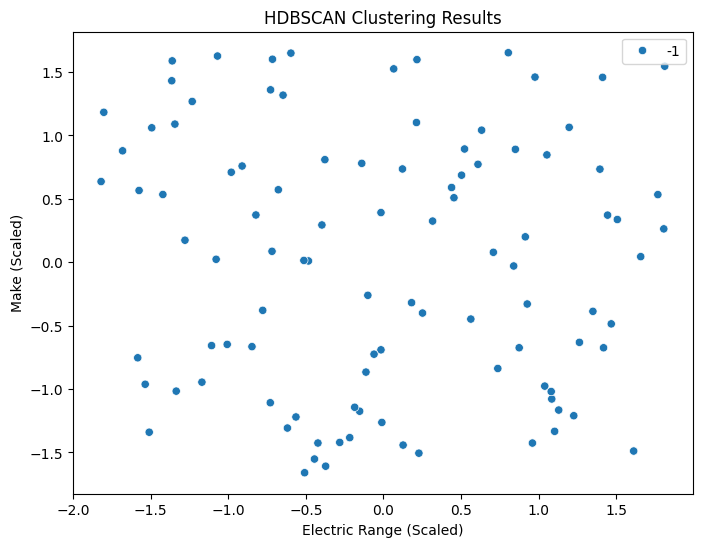

In [ ]:

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=features_scaled[:, 2],  # Electric Range (Scaled)
    y=features_scaled[:, 0],  # Make (Scaled)
    hue=df['HDBSCAN_Cluster'],  # Use the existing HDBSCAN_Cluster column
    palette='tab10'
)

plt.title('HDBSCAN Clustering Results')
plt.xlabel('Electric Range (Scaled)')
plt.ylabel('Make (Scaled)')
plt.legend()
plt.show()


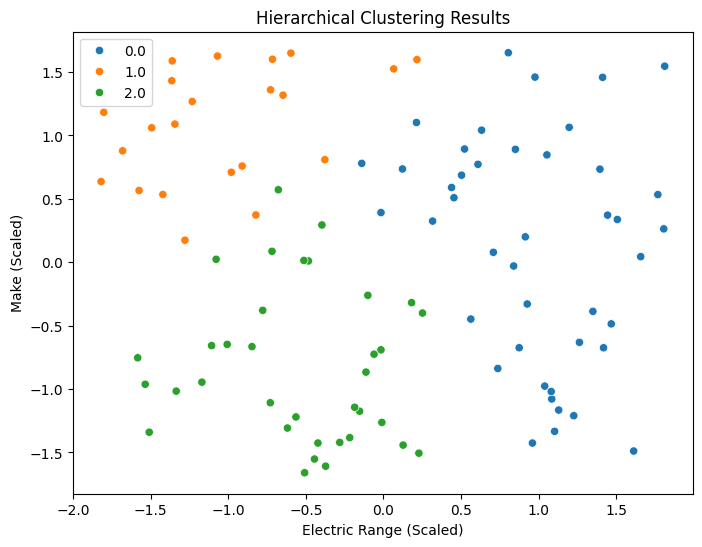

In [ ]:

# Create the plot using the Hierarchical_Cluster column for hue
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=features_scaled[:, 2],  # Electric Range (Scaled)
    y=features_scaled[:, 0],  # Make (Scaled)
    hue=df['Hierarchical_Cluster'],  # Use the Hierarchical_Cluster column
    palette='tab10'
)

# Add titles and labels
plt.title('Hierarchical Clustering Results')
plt.xlabel('Electric Range (Scaled)')
plt.ylabel('Make (Scaled)')
plt.legend()
plt.show()


# 🚗 Electric Vehicle Population Clustering for Data-Driven Insights

This project clusters Washington State's EV population to uncover actionable market segments using KMeans, HDBSCAN, and Hierarchical Clustering.

## Tasks Completed:
- Data cleaning (duplicates, missing values, outliers)
- EDA & visualization
- Applied KMeans, hDBSCAN, and Hierarchical clustering
- Visualized clusters for business insights

Run `notebooks/clustering_analysis.ipynb` to reproduce the analysis.
